# Recommender System

Developing a very simple movie recommender system in Python that uses the correlation between the ratings assigned to different movies. Thus, we will find the similarity between the movies.

In [2]:
#import the basic libraries and import the data.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization

import seaborn as sns           # statistical data visualization
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
#explore ratings file
ratings_file = 'E:\\Resolve6_Training\\DS_ML\\Sample Data Sets\\Movies\\ratings.csv'
df_ratings = pd.read_csv(ratings_file)
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


There is one problem with this dataset. It contains the IDs of the movies but not their titles. We will need movie names of the movies to recommend. The movie names are stored in the movies.csv file.

In [4]:
movies_file = 'E:\\Resolve6_Training\\DS_ML\\Sample Data Sets\\Movies\\movies.csv'
df_movies = pd.read_csv(movies_file)
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


To get our desired information in a single dataframe, we can merge the two dataframes objects on the movieId column since it is common between the two dataframes.

In [5]:
movie_data = pd.merge(df_ratings, df_movies, on='movieId')
movie_data.head(20)

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama
5,31,16,4.0,832397760,Casino (1995),Crime|Drama
6,47,16,4.0,853361808,Casino (1995),Crime|Drama
7,60,16,4.0,1162941904,Casino (1995),Crime|Drama
8,62,16,4.5,1267576909,Casino (1995),Crime|Drama
9,88,16,3.5,1180879072,Casino (1995),Crime|Drama


Now let's take a look at the average rating of each movie. To do so, we can group the dataset by the title of the movie and then calculate the mean of the rating for each movie. We will then display the first five movies along with their average rating using the head() method as follows:

In [6]:
movie_data.groupby('title')['rating'].mean().head(50)

title
'71 (2014)                                                3.500000
'Hellboy': The Seeds of Creation (2004)                   3.000000
'Round Midnight (1986)                                    2.500000
'Til There Was You (1997)                                 4.000000
'burbs, The (1989)                                        3.125000
'night Mother (1986)                                      3.000000
(500) Days of Summer (2009)                               3.932432
*batteries not included (1987)                            3.318182
...And Justice for All (1979)                             3.650000
10 (1979)                                                 2.000000
10 Items or Less (2006)                                   3.833333
10 Things I Hate About You (1999)                         3.491525
10 to Midnight (1983)                                     2.500000
10,000 BC (2008)                                          2.409091
100 Girls (2000)                                        

We can see that the average ratings are not sorted. Let's sort the ratings in the descending order of their average ratings:

In [7]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(25)

title
Saddest Music in the World, The (2003)                                                                             5.0
Interstate 60 (2002)                                                                                               5.0
Gunfighter, The (1950)                                                                                             5.0
Heima (2007)                                                                                                       5.0
Limelight (1952)                                                                                                   5.0
Plague Dogs, The (1982)                                                                                            5.0
Love Me If You Dare (Jeux d'enfants) (2003)                                                                        5.0
Syrup (2013)                                                                                                       5.0
Interstella 5555: The 5tory of the 5ecret 

However, there is a problem. A movie can make it to the top of the above list even if only a single user has given it five stars. Therefore, the above stats can be misleading. Normally, a movie which is really a good one gets a higher rating by a large number of users.

In [9]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Pulp Fiction (1994)                          325
Forrest Gump (1994)                          311
Shawshank Redemption, The (1994)             308
Jurassic Park (1993)                         294
Silence of the Lambs, The (1991)             290
Star Wars: Episode IV - A New Hope (1977)    273
Matrix, The (1999)                           261
Terminator 2: Judgment Day (1991)            253
Braveheart (1995)                            248
Schindler's List (1993)                      248
Name: rating, dtype: int64

We will create a new dataframe called ratings_mean_count and first add the average rating of each movie to this dataframe as follows-

In [10]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean())

Next up, we will add the number of ratings for a movie to the ratings_mean_count dataframe as follows-

In [11]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head(50)

,rating,rating_counts
title,,
'71 (2014),3.500000,1
'Hellboy': The Seeds of Creation (2004),3.000000,1
'Round Midnight (1986),2.500000,1
'Til There Was You (1997),4.000000,3
"'burbs, The (1989)",3.125000,20
'night Mother (1986),3.000000,1
(500) Days of Summer (2009),3.932432,37
*batteries not included (1987),3.318182,11
...And Justice for All (1979),3.650000,10


Now, let's plot a histogram for the number of ratings represented by the rating_counts column in the above dataframe.

<Axes: >

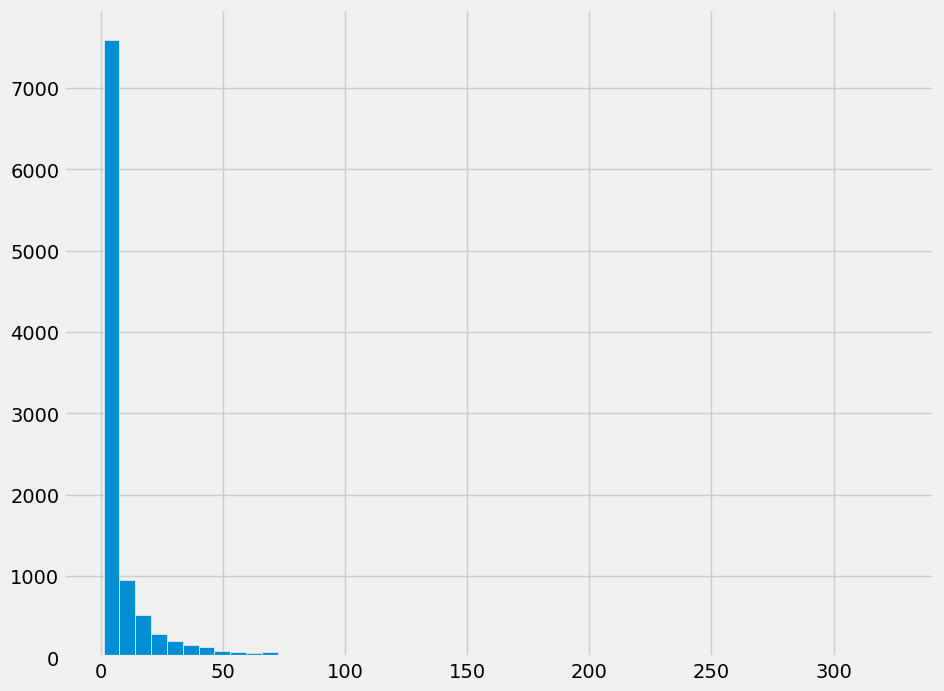

In [12]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

From the above plot, we can see that most of the movies have received less than 50 ratings and there are no movies having more than 100 ratings.

Now, we will plot a histogram for average ratings.

In [ ]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

Movies with a higher number of ratings usually have a high average rating as well since a good movie is normally well-known and a well-known movie is watched by a large number of people, and thus usually has a higher rating.

Let's see if this is also the case with the movies in our dataset. We will plot average ratings against the number of ratings.

In [ ]:
plt.figure(figsize=(10,8))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

The graph shows that, in general, movies with higher average ratings actually have more number of ratings, compared with movies that have lower average ratings.

# Finding Similarities Between Movies 

Now, it is the time to find the similarity between the movies.

We will use the correlation between the ratings of a movie as the similarity metric.

To find the correlation between the ratings of the movie, we need to create a matrix where each column is a movie name and each row contains the rating assigned by a specific user to that movie.

This matrix will have a lot of null values since every movie is not rated by every user.

We will create the matrix of movie titles and corresponding user ratings.

In [13]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')

user_movie_rating.head(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Now, let's find all the user ratings for the movie Forrest Gump (1994) and find the movies similar to it.

We chose this movie since it has the highest number of ratings and we want to find the correlation between movies that have a higher number of ratings.

We will find the user ratings for Forrest Gump (1994) as follows

In [15]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']

forrest_gump_ratings.head(50)

userId
1     3.0
2     NaN
3     3.0
4     NaN
5     NaN
6     NaN
7     5.0
8     NaN
9     3.0
10    4.0
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    3.0
17    5.0
18    4.0
19    NaN
20    NaN
21    NaN
22    5.0
23    NaN
24    NaN
25    5.0
26    NaN
27    NaN
28    3.0
29    4.0
30    4.0
31    NaN
32    5.0
33    NaN
34    NaN
35    NaN
36    3.0
37    NaN
38    4.5
39    4.0
40    NaN
41    NaN
42    NaN
43    NaN
44    NaN
45    NaN
46    NaN
47    NaN
48    NaN
49    NaN
50    2.0
Name: Forrest Gump (1994), dtype: float64

In [16]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [17]:
corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])
corr_forrest_gump.dropna(inplace=True)
corr_forrest_gump.head(20)

,Correlation
title,
"'burbs, The (1989)",0.056266
(500) Days of Summer (2009),0.144325
*batteries not included (1987),0.000000
...And Justice for All (1979),0.089924
10 (1979),0.693375
10 Items or Less (2006),0.693375
10 Things I Hate About You (1999),-0.043839
"10,000 BC (2008)",0.845657
100 Girls (2000),-1.000000


Now, let's sort the movies in descending order of correlation to see highly correlated movies at the top.

In [18]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Martian Child (2007),1.0
Revolutionary Road (2008),1.0
Bottle Shock (2008),1.0
Anna Karenina (2012),1.0
Elegy (2008),1.0
Half Light (2006),1.0
"Unvanquished, The (Aparajito) (1957)",1.0
Save the Tiger (1973),1.0
First Kid (1996),1.0


From the above output, we can see that the movies that have high correlation with Forrest Gump (1994) are not very well known.

This shows that correlation alone is not a good metric for similarity because there can be a user who watched 'Forest Gump (1994) and only one other movie and rated both of them as 5.

A solution to this problem is to retrieve only those correlated movies that have at least more than 50 ratings.

To do so, we will add the rating_counts column from the rating_mean_count dataframe to our corr_forrest_gump dataframe.

In [19]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])
corr_forrest_gump.head()

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.056266,20
(500) Days of Summer (2009),0.144325,37
*batteries not included (1987),0.000000,11
...And Justice for All (1979),0.089924,10
10 (1979),0.693375,3


We can see that the movie 10, which has the highest correlation has only three ratings. This means that only three users gave same ratings to Forest Gump (1994).

However, we can deduce that a movie cannot be declared similar to the another movie based on just 3 ratings. This is why we added rating_counts column.

Now, let's now filter movies correlated to Forest Gump (1994), that have more than 50 ratings.

In [20]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head(10)

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,311
Happy Gilmore (1996),0.715602,79
12 Angry Men (1957),0.545139,63
As Good as It Gets (1997),0.521448,98
First Knight (1995),0.520438,52
"Hunchback of Notre Dame, The (1996)",0.510794,54
Mr. Holland's Opus (1995),0.500052,91
"Patriot, The (2000)",0.492446,67
Field of Dreams (1989),0.480440,70


Now, we can see from the above output the movies that are highly correlated with Forrest Gump (1994).

The movies in the list are some of the most famous movies Hollywood movies, and since Forest Gump (1994) is also a very famous movie, there is a high chance that these movies are highly correlated.